In [25]:
% reset
% config InlineBackend.figure_format = 'retina'

import numpy as np

% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
sns.set(style='whitegrid', context ='paper')


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# geocoding an address using built-in python tools

import requests
url = 'https://maps.googleapis.com/maps/api/geocode/json'
params = {'sensor': 'false', 'address': 'UCSD Peterson Hall, Peterson Hall, San Diego, CA'}
r = requests.get(url, params=params)
results = r.json()['results']
location = results[0]['geometry']['location']
location['lat'], location['lng']


(32.8799725, -117.2403292)

In [28]:
# simplified method using geocoder package
# https://pypi.python.org/pypi/geocoder
# pip install geocoder

import geocoder
g = geocoder.google('UCSD Peterson Hall, Peterson Hall, San Diego, CA')
g.json


{'accuracy': 'APPROXIMATE',
 'address': 'Peterson Hall, San Diego, CA 92161, USA',
 'bbox': {'northeast': [32.8813214802915, -117.2389802197085],
  'southwest': [32.8786235197085, -117.2416781802915]},
 'city': 'San Diego',
 'confidence': 9,
 'country': 'US',
 'county': 'San Diego County',
 'encoding': 'utf-8',
 'lat': 32.8799725,
 'lng': -117.2403292,
 'location': 'UCSD Peterson Hall, Peterson Hall, San Diego, CA',
 'neighborhood': 'Torrey Pines',
 'ok': True,
 'place': 'ChIJVVWVPMEG3IARwketHZ95mRc',
 'postal': '92161',
 'provider': 'google',
 'quality': 'establishment',
 'state': 'CA',
 'status': 'OK',
 'status_code': 200}

In [29]:
g.latlng

[32.8799725, -117.2403292]

In [30]:
# reverse geocoding a lat/lng to an address

g = geocoder.google(g.latlng, method='reverse')
g.json


{'accuracy': 'ROOFTOP',
 'address': 'Peterson Hall, San Diego, CA 92161, USA',
 'bbox': {'northeast': [32.8801482, -117.2399776],
  'southwest': [32.8798151, -117.2404867]},
 'city': 'San Diego',
 'confidence': 10,
 'country': 'US',
 'county': 'San Diego County',
 'encoding': 'utf-8',
 'lat': 32.8799725,
 'lng': -117.2403292,
 'location': '32.8799725, -117.2403292',
 'neighborhood': 'La Jolla',
 'ok': True,
 'place': 'ChIJ7_CMPMEG3IARNjPda8p-8MU',
 'postal': '92161',
 'provider': 'google',
 'quality': 'premise',
 'state': 'CA',
 'status': 'OK',
 'status_code': 200}

In [31]:
# working with shapefiles
# neighborhood shapefile data from Zillow:
# https://www.zillow.com/howto/api/neighborhood-boundaries.htm
#
# shapefile package: pyshp
# https://pypi.python.org/pypi/pyshp
# pip install pyshp

import shapefile
sf = shapefile.Reader("ZillowNeighborhoods-RI.shp")
shapes = sf.shapes()


In [33]:
 shapes[0].points

[(-71.36572999999999, 41.858280000000036),
 (-71.36396141399996, 41.85848524600004),
 (-71.36259364299997, 41.85864397700004),
 (-71.35926339599996, 41.85903045600003),
 (-71.33413851099994, 41.86194622200003),
 (-71.33439699999997, 41.86130000000003),
 (-71.33489699999996, 41.860600000000034),
 (-71.33719899999994, 41.855905000000064),
 (-71.33722731299997, 41.85584866000005),
 (-71.33722952299996, 41.855842489000054),
 (-71.33739699999995, 41.85550000000006),
 (-71.33739666999998, 41.855134306000025),
 (-71.33767399999994, 41.85501900000003),
 (-71.33820499999996, 41.85470900000007),
 (-71.33851199999998, 41.85460000000006),
 (-71.33888999999994, 41.854588000000035),
 (-71.33905199999998, 41.85454800000008),
 (-71.33921899999996, 41.854472000000044),
 (-71.33961199999999, 41.85435300000006),
 (-71.33972099999994, 41.854299000000026),
 (-71.33977099999998, 41.85422700000004),
 (-71.33978899999994, 41.85414700000007),
 (-71.33981299999994, 41.85362200000003),
 (-71.33983799999999, 41.8

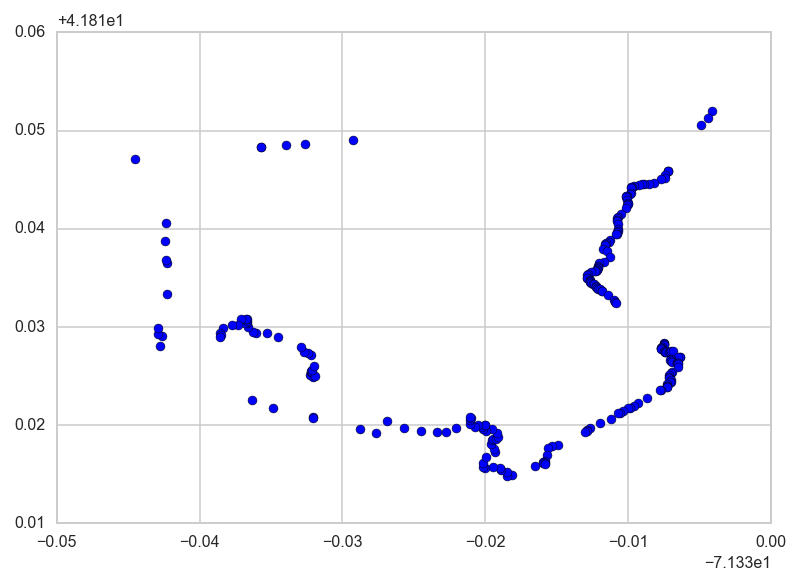

In [37]:
j=0
for i in range(len(shapes[j].points)):
    plt.scatter(shapes[j].points[i][0], shapes[j].points[i][1])

plt.show()